In [1]:
import pandas as pd
import numpy as np
import string

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
data.sample(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3006,ham,Ah you see. You have to be in the lingo. I wil...,NaN,NaN,NaN
3607,ham,Pls come quick cant bare this.,NaN,NaN,NaN
2219,spam,You have WON a guaranteed å£1000 cash or a å£2...,NaN,NaN,NaN
1355,ham,Convey my regards to him,NaN,NaN,NaN
3095,ham,We walked from my moms. Right on stagwood pass...,NaN,NaN,NaN
4117,ham,Watch lor. I saw a few swatch one i thk quite ...,NaN,NaN,NaN
846,ham,My stomach has been thru so much trauma I swea...,NaN,NaN,NaN


1. Data cleaning
2. EDA
3. Text Processing
4. Model Building
5. Model Evaluation
6. Improvement
7. Website
8. Model Deployement


## 1. Data Cleaning


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last three columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [6]:
data.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# renaming columns
data.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [8]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
data['target'] = encoder.fit_transform(data['target'])

In [11]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# check missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#check for duplicate values
data.duplicated().sum()

403

In [14]:
# removing duplicates
data = data.drop_duplicates(keep='first')

In [15]:
#check for duplicate values
data.duplicated().sum()

0

In [16]:
data.shape

(5169, 2)

# 2. EDA

In [17]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

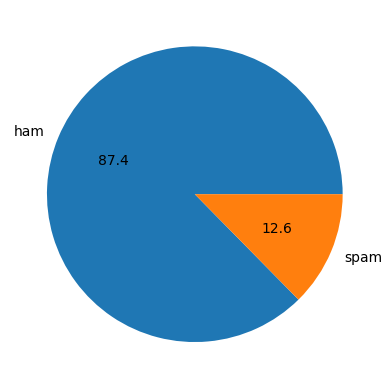

In [18]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'], autopct='%0.1f')
plt.show()

Data is Imbalanced

In [55]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
ps = PorterStemmer()
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
data['Num_of_characters']=data['text'].apply(len)

In [21]:
data.head()

,target,text,Num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# no. of words
data['Num_of_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
data.head()

,target,text,Num_of_characters,Num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
# no. of sentences
data['Num_of_sent']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
data.head()

,target,text,Num_of_characters,Num_of_words,Num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
data.describe()

,target,Num_of_characters,Num_of_words,Num_of_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


<Axes: xlabel='Num_of_characters', ylabel='Count'>

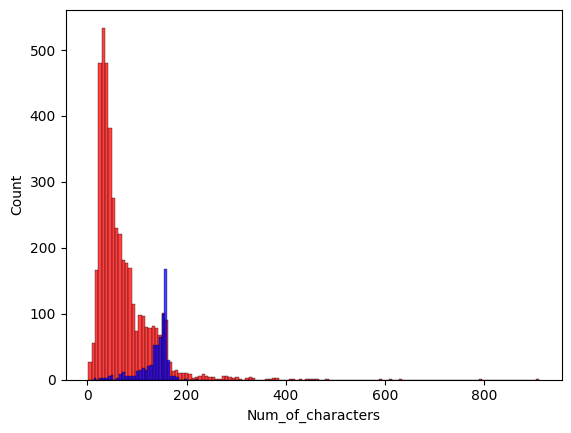

In [27]:
# histogram Ham and Spam comare to number of characters
import seaborn as sns
sns.histplot(data[data['target']== 0]['Num_of_characters'], color='red')
sns.histplot(data[data['target']== 1]['Num_of_characters'], color='blue')

<Axes: xlabel='Num_of_words', ylabel='Count'>

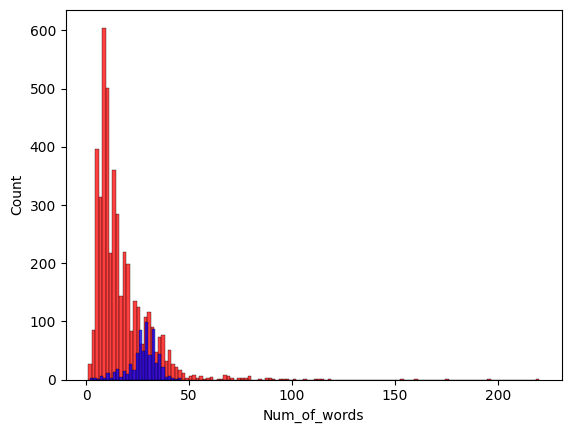

In [28]:
# histogram Ham and Spam comare to number of words
sns.histplot(data[data['target']== 0]['Num_of_words'], color='red')
sns.histplot(data[data['target']== 1]['Num_of_words'], color='blue')

## 3. Text Preprocessing
- lower case
- tokenization
- Removing special characters
- Removing stopwords
- stemming

In [29]:
def transform_text(text):
    # Lower case
    text = text.lower()
    # Tokenization
    text = nltk.word_tokenize(text)
    
    # Removing special characters   
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # Removing stopwords        
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # stemming
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [30]:
transform_text('Did you complete your Project ?')

'complet project'

In [31]:
data['transformed_text'] = data['text'].apply(transform_text)

In [32]:
data.head()

,target,text,Num_of_characters,Num_of_words,Num_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10, background_color='white')


In [34]:
spam_wc = wc.generate(data[data['target']== 1]['transformed_text'].str.cat(sep=" "))

In [35]:
ham_wc = wc.generate(data[data['target']== 0]['transformed_text'].str.cat(sep=" "))

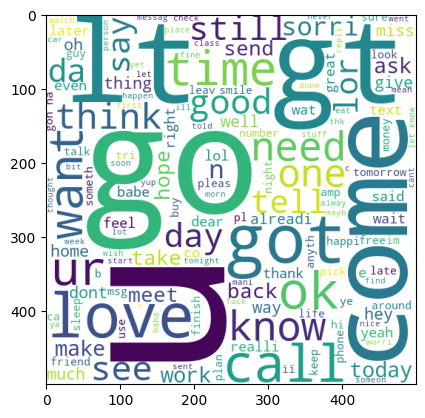

In [36]:
plt.imshow(ham_wc)

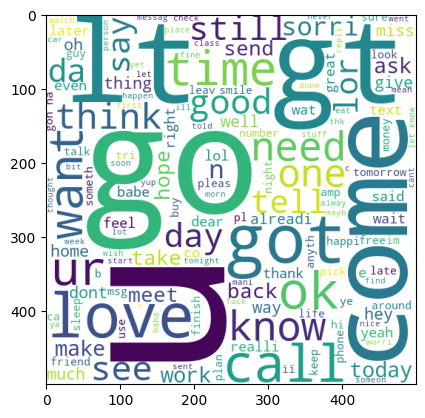

In [37]:
plt.imshow(spam_wc)

In [38]:
spam_corpus = []
for i in data[data['target'] == 1]['transformed_text'].tolist():
    for word in i.split():
        spam_corpus.append(word)
    

In [39]:
len(spam_corpus)

9939

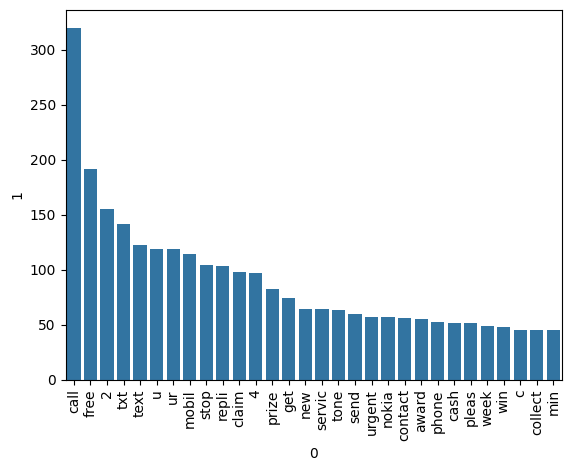

In [40]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [41]:
ham_corpus = []
for i in data[data['target'] == 0]['transformed_text'].tolist():
    for word in i.split():
        ham_corpus.append(word)
    

In [42]:
len(ham_corpus)

35404

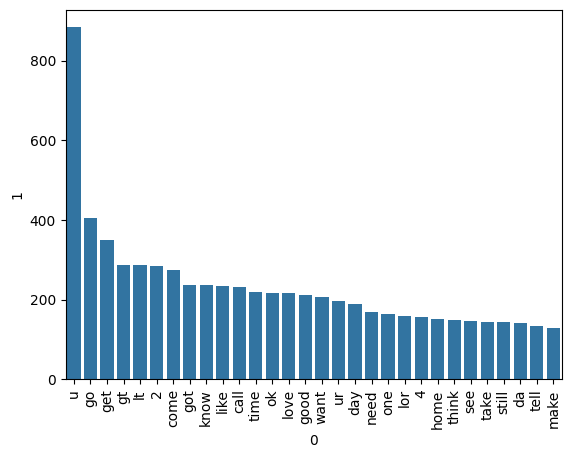

In [43]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [45]:

# Assuming 'transformed_text' is the column in your 'data' dataframe containing text data
text_data = data['transformed_text'].astype(str)

# Reshape the data to a 1D array
text_data_reshaped = text_data.values.reshape(-1)

# Fit and transform the text data
X = tfidf.fit_transform(text_data_reshaped).toarray()


In [46]:
y = data['target'].values

In [47]:
from sklearn.model_selection import train_test_split


In [48]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=2)

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb= BernoulliNB()

In [51]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [52]:
# Best model
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [53]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [54]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))